In [281]:
import numpy as np 
import pandas as pd 

In [282]:
df = pd.read_csv("C:/Users/Mohammad Nahle/Downloads/Techlabs Data/AcceptedLoans.csv")

In [283]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [284]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [285]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [286]:
df.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [287]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [288]:
df.loan_status_bin

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status_bin, Length: 396030, dtype: int64

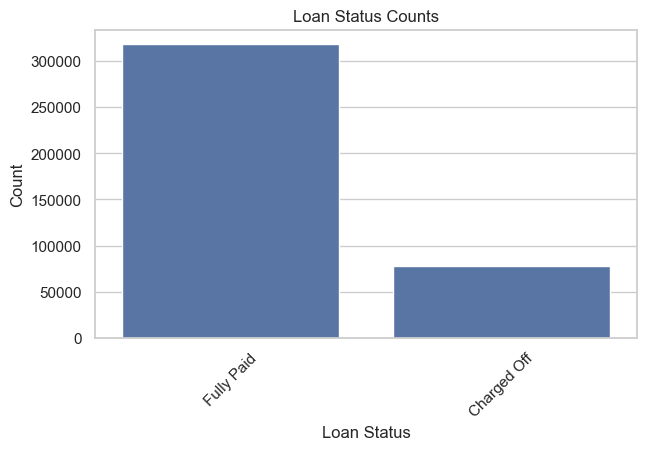

In [289]:
plt.figure(figsize=(7, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: Rotate labels if they overlap
plt.show()

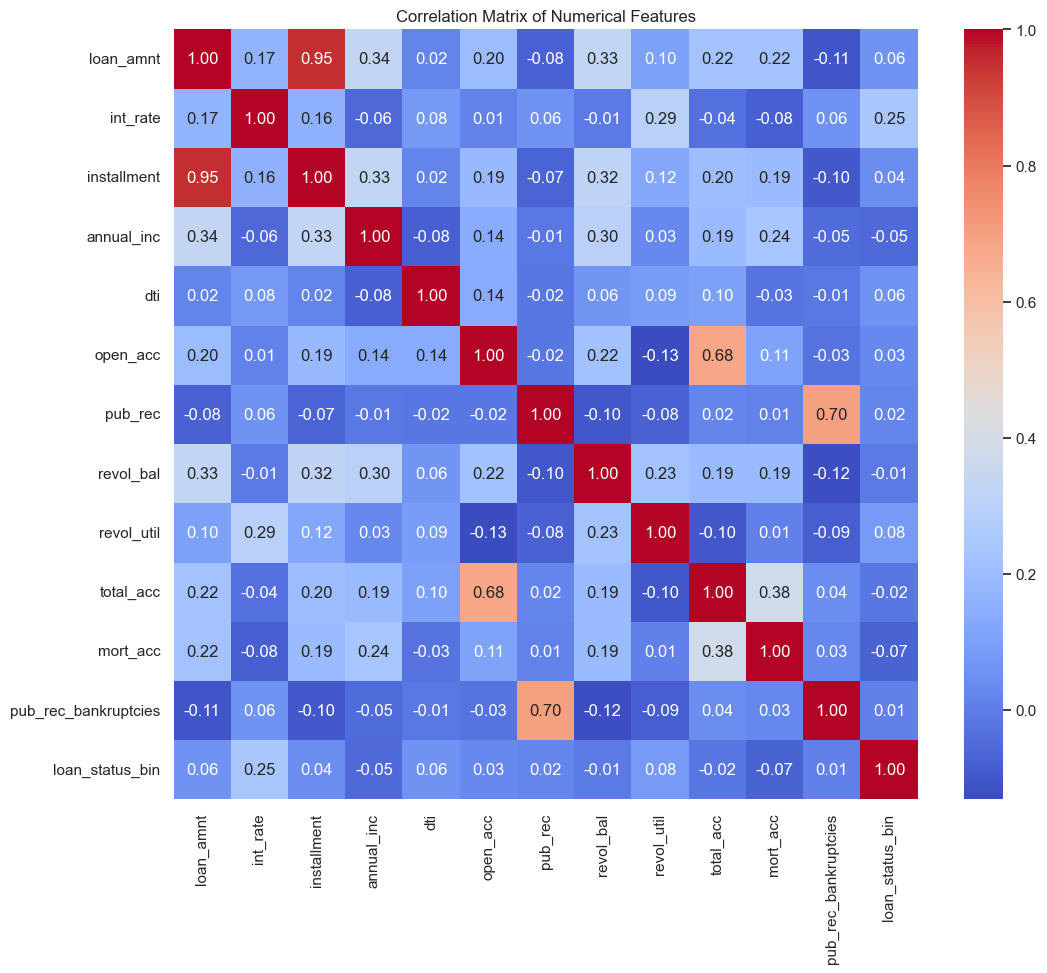

In [290]:

# Assume 'default_rate' is a column where 1 indicates default and 0 no default
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# We noticed almost perfect correlation between "loan_amnt" the "installment" feature (0.95)

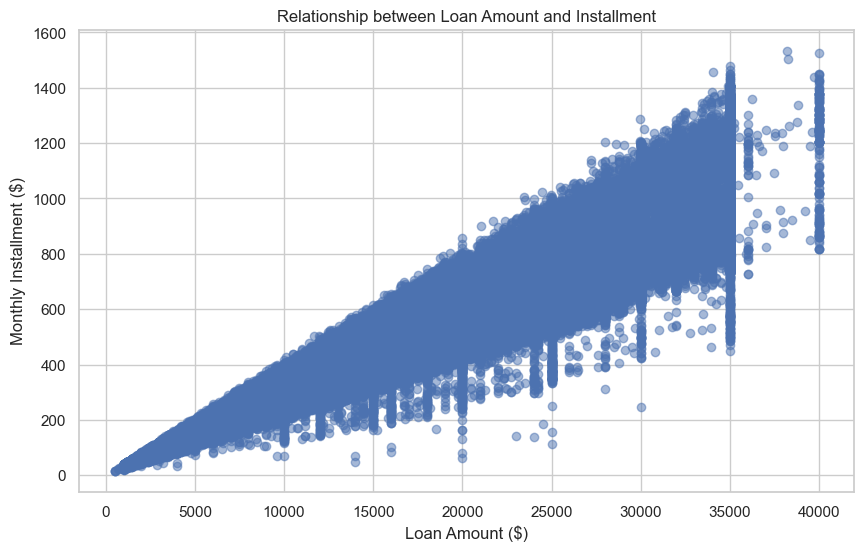

In [291]:
##################################### loan_amnt & installment ##########################################

#installment: The monthly payment owed by the borrower if the loan originates.
#loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

# The monthly installment is directly calculated from the loan amount using the interest rate and the term (length) of the loan. 
# Therefore, a higher loan amount will naturally lead to a higher installment, assuming the term and interest rate remain constant.

plt.figure(figsize=(10, 6))
plt.scatter(df['loan_amnt'], df['installment'], alpha=0.5)
plt.title('Relationship between Loan Amount and Installment')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Installment ($)')
plt.grid(True)
plt.show()



#clear linear pattern, this indicates a strong linear relationship, confirming the hypothesis about their correlation

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\195546442.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




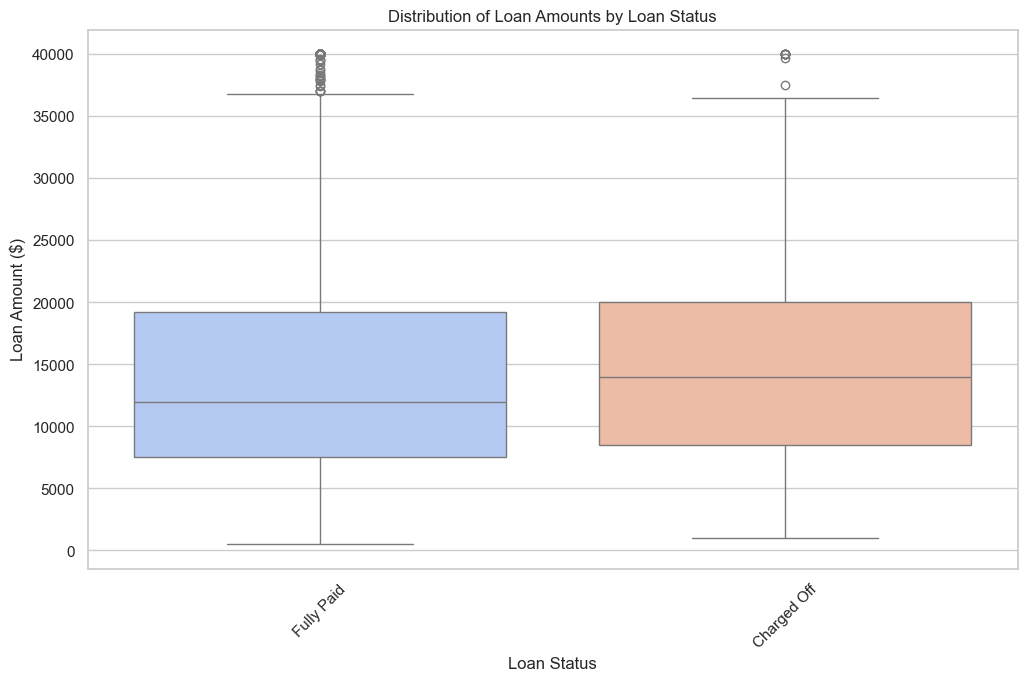

In [292]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='coolwarm')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\1894200276.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




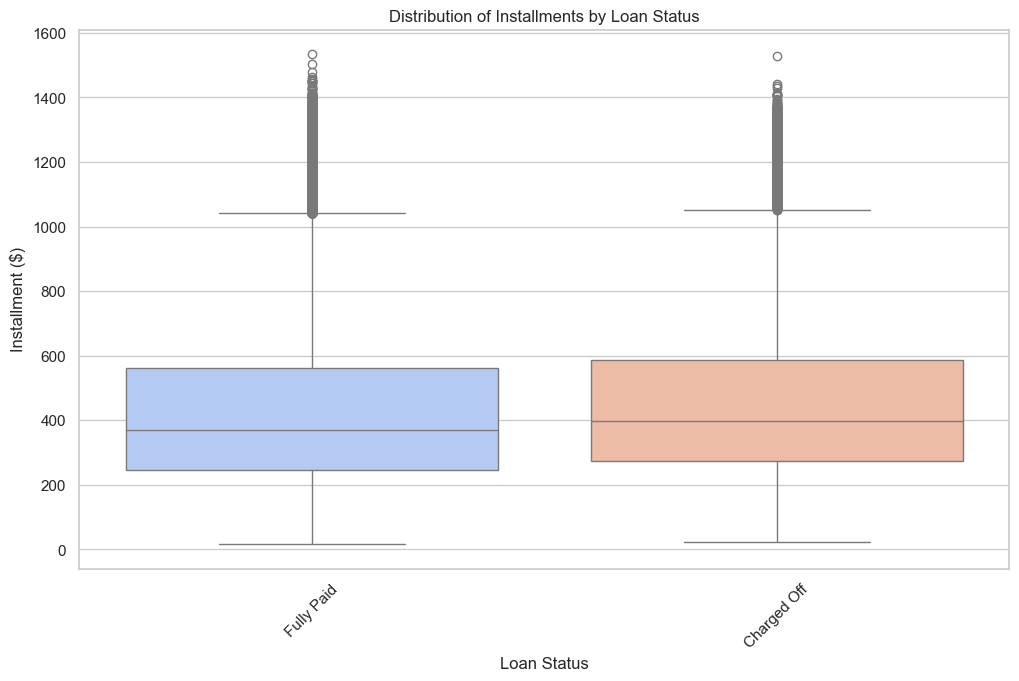

In [293]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='installment', data=df, palette='coolwarm')
plt.title('Distribution of Installments by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installment ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [294]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [295]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=df.groupby('sub_grade')['int_rate'].mean())

#Describing the linear connection between default rate and interest rate using linear regression


LinearRegression()

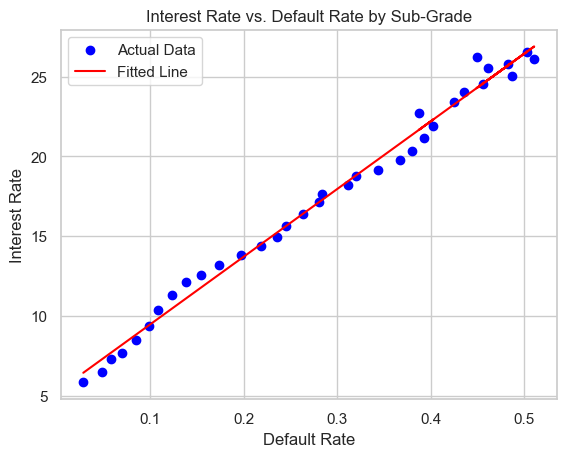

In [296]:
# Assuming 'df' is your DataFrame and it has been prepared with necessary preprocessing
# Creating the linear regression object
default_rate_means = df.groupby('sub_grade')['loan_status_bin'].mean()
interest_rate_means = df.groupby('sub_grade')['int_rate'].mean()

# Scatter plot
plt.scatter(default_rate_means, interest_rate_means, color='blue', label='Actual Data')

# Predicted values for the line plot using the linear regression model 'lr'
predicted_interest_rates = lr.predict(default_rate_means.values.reshape(-1, 1))

# Line plot
plt.plot(default_rate_means, predicted_interest_rates, color='red', label='Fitted Line')

# Adding labels and legend
plt.xlabel('Default Rate')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Default Rate by Sub-Grade')
plt.legend()  # This adds the legend to the plot

# Display the plot
plt.show()

In [297]:
print('interest rate = ', lr.intercept_, '+', lr.coef_[0], '* default rate')

interest rate =  5.216621308807113 + 42.43980704484836 * default rate


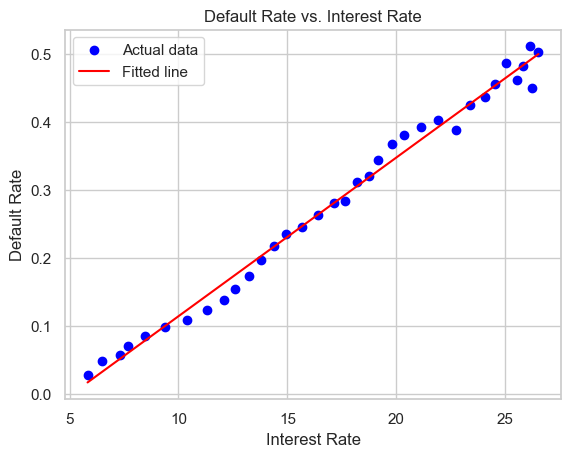

In [298]:
lr = LinearRegression()

# Fitting the model (switching x and y)
X = df.groupby('sub_grade')['int_rate'].mean().values.reshape(-1, 1)  # Interest rates as X
y = df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1, 1)  # Default rates as y

lr.fit(X, y)

# Making predictions
predicted_default_rates = lr.predict(X)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predicted_default_rates, color='red', label='Fitted line')

plt.title('Default Rate vs. Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.legend()
plt.grid(True)
plt.show()

In [299]:
print(f'Default rate = {lr.intercept_[0]:.4f} + {lr.coef_[0][0]:.4f} * interest rate')


Default rate = -0.1186 + 0.0233 * interest rate


loan_status_bin          0          1
grade                                
A                 7.375193   7.656060
B                11.205611  11.344957
C                14.313326  14.335357
D                17.511978  17.416891
E                20.303191  20.249170
F                23.636009  23.788237
G                25.807075  26.010418


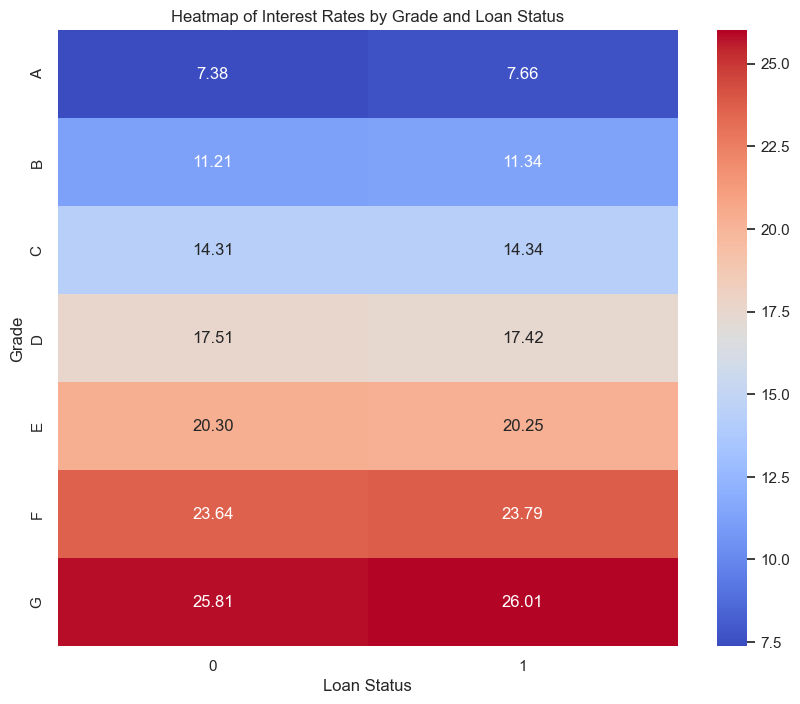

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table = df.pivot_table(values='int_rate', index='grade', columns='loan_status_bin', aggfunc='mean')

# Display the pivot table
print(pivot_table)
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")  # 'fmt' is used to format the numerical values
plt.title('Heatmap of Interest Rates by Grade and Loan Status')
plt.ylabel('Grade')
plt.xlabel('Loan Status')
plt.show()

# 0 is fully paid, 1 is charged off

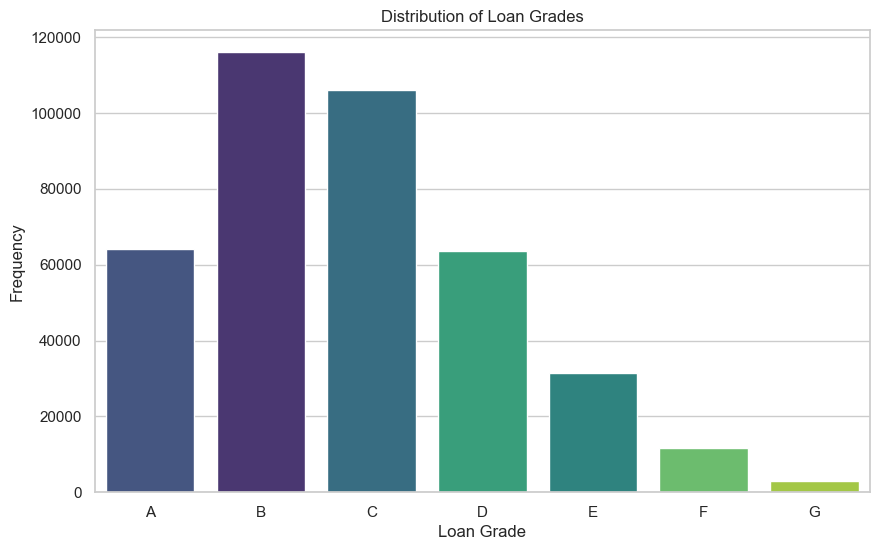

In [301]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
# Since 'grade' does not naturally pair with 'hue' here because it is the main categorical variable,
# we use 'palette' directly with 'x' and manage legend display
sns.countplot(x='grade', data=df, palette='viridis', order=sorted(df['grade'].unique()), hue='grade', legend=False)
plt.title('Distribution of Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.show()

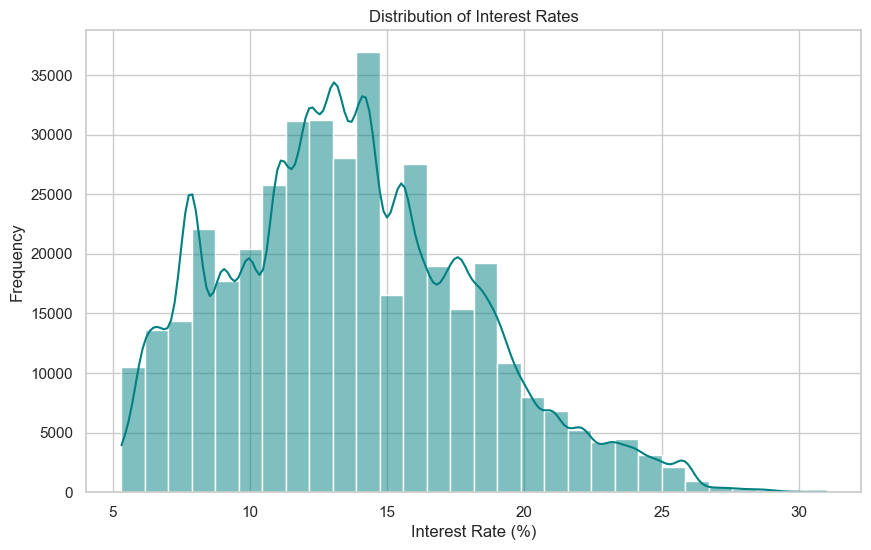

In [302]:
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], bins=30, kde=True, color='teal')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\4022656827.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\4022656827.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




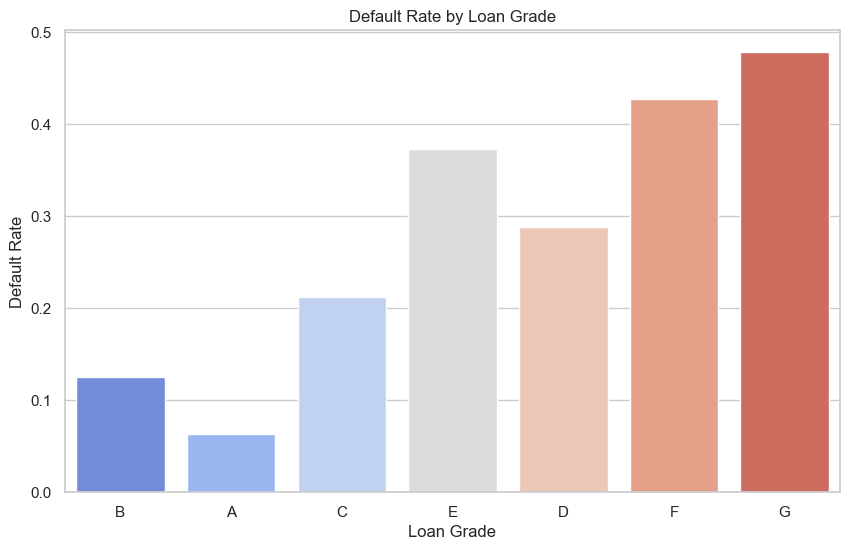

In [303]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status_bin', data=df, ci=None, palette='coolwarm')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\2072453953.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




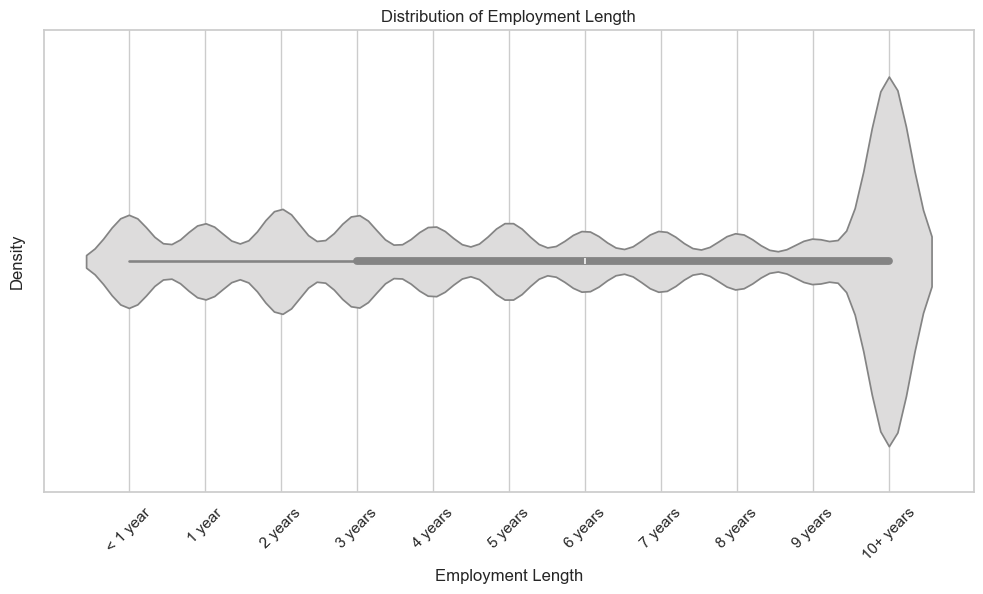

In [304]:
# Ensure that 'emp_length' is a categorical type for better ordering in the plot
df['emp_length'] = pd.Categorical(df['emp_length'], categories=[
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'], ordered=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='emp_length', data=df, palette='coolwarm')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Density')
plt.xticks(rotation=45)  # Rotating labels for better readability
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\2900808380.py:2: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




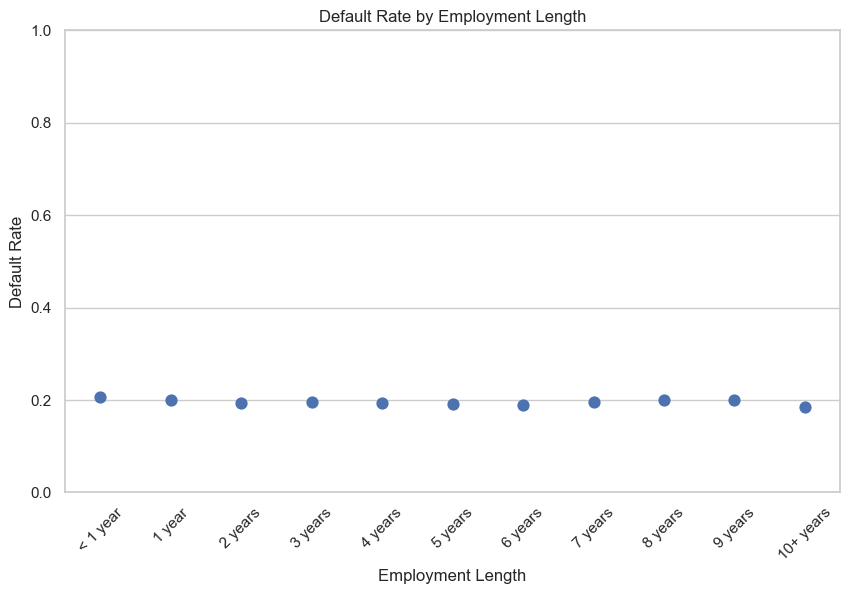

In [305]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='emp_length', y='loan_status_bin', data=df, join=False)
plt.ylim(0, 1)  # Assuming default_rate is a probability that ranges from 0 to 1
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mohammad Nahle\AppData\Local\Temp\ipykernel_25016\1405392583.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




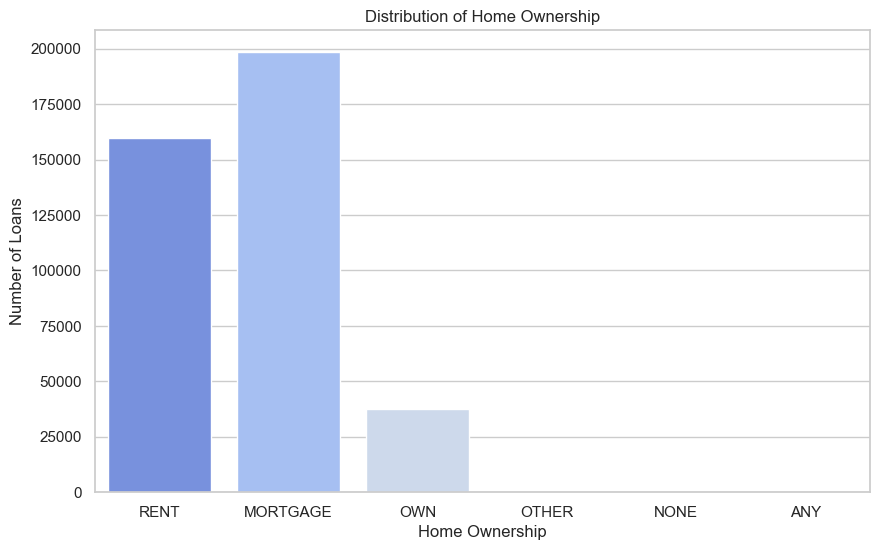

In [306]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df, palette='coolwarm')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.show()

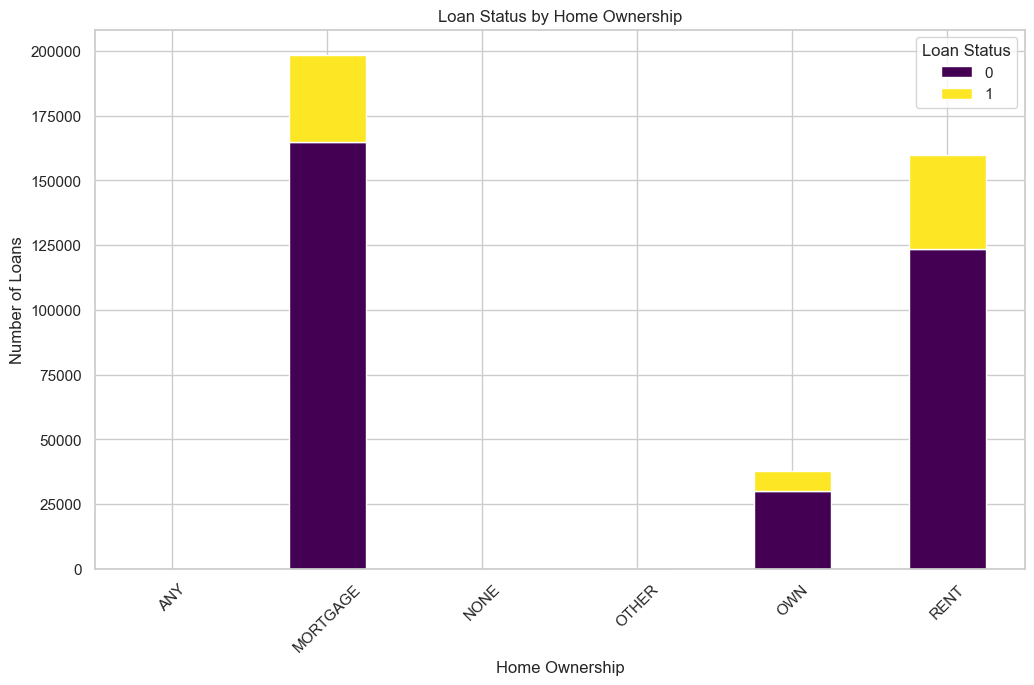

In [307]:
home_loan_status = df.groupby(['home_ownership', 'loan_status_bin']).size().unstack(fill_value=0)

# Plotting
home_loan_status.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

In [308]:
#Logistic regression is a statistical model used for binary classification tasks, which predicts the probability of the dependent variable being a success (usually coded as 1) based on one or more predictor variables.
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_status_bin'],
      dtype='object')

In [310]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_bin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",1


In [313]:
columns_with_na = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_na)

Columns with missing values: ['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']


In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(['loan_status', 'loan_status_bin'], axis=1)  # dropping both to prevent redundancy
y = df['loan_status_bin']

X.fillna(X.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str